## Customer Segmentation Engine

Data Science Project for Marketing Analytics

This project aims to segregate customers into different groups for further identification and analysis of spending behaviors. These behaviors can serve different marketing strategies for different groups of customers.

**Dataset Details: MALL CUSTOMER DATASET**
* Customer id - the id assigned to the customer visiting the mall.
* Gender - gender of the customer.
* Age - age of the customer.
* Annual Income - annual income of the customer.
* Spending Score - spending score of the customer visiting the mall. Spending Score is assigned to a customer based on their behaviour and purchasing items from the mall.

In [1]:
%pip install pandas
%pip install numpy
%pip install seaborn
%pip install scikit
%pip install dabl

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     |████████████████████████████████| 294 kB 4.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement scikit (from versions: none)
ERROR: No matching distribution found for scikit
Note: you may need to restart the kernel to use updated packages.
     |████████████████████████████████| 567 kB 5.3 MB/s eta 0:00:01
     |████████████████████████████████| 12.2 MB 72.9 MB/s eta 0:00:01
     |████████████████████████████████| 302 kB 79.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


### Importing Libraries

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
import dabl

### Data Examination

In [4]:
data = pd.read_csv("Mall_Customers.csv")

In [5]:
data.shape

(200, 5)

In [6]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [8]:
data.sample(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
110,111,Male,65,63,52
155,156,Female,27,78,89
186,187,Female,54,101,24


### Data Visualization

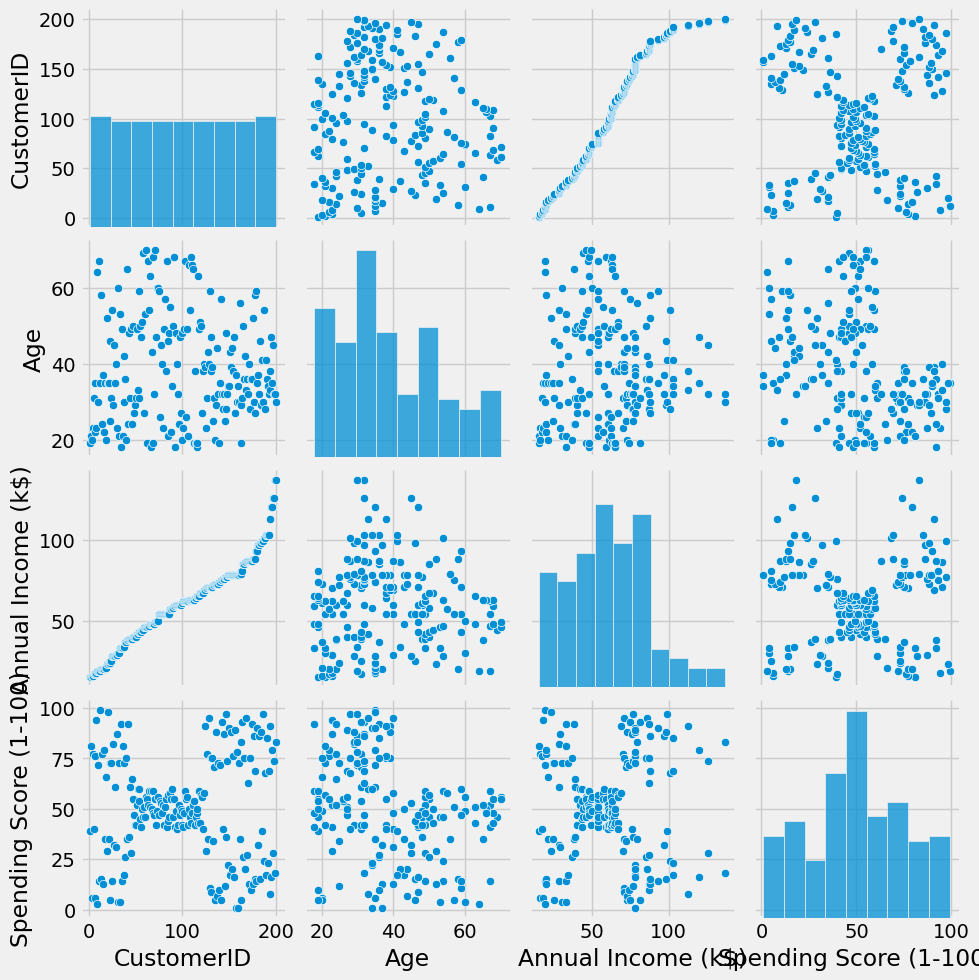

In [9]:
#Pair Plot of the data
sns.pairplot(data)
plt.show()

Target looks like regression


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/dabl/plot/supervised.py:214: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = X_new.groupby(col)[target_col].median()


[<Axes: title={'center': 'Target distribution'}, xlabel='Spending Score (1...', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=-3.45E-01'}, xlabel='Age', ylabel='Spending Score (1...'>,
         <Axes: title={'center': 'F=7.84E-03'}, xlabel='Annual Income (k$)'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=7.82E-02'}, xlabel='Spending Score (1-100)', ylabel='Gender'>]],
       dtype=object)]

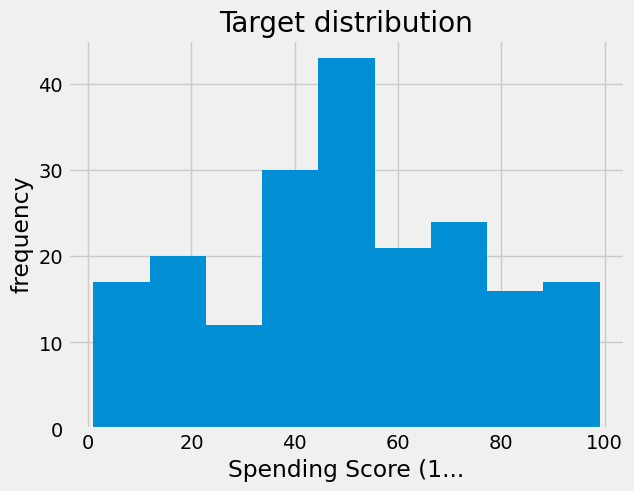

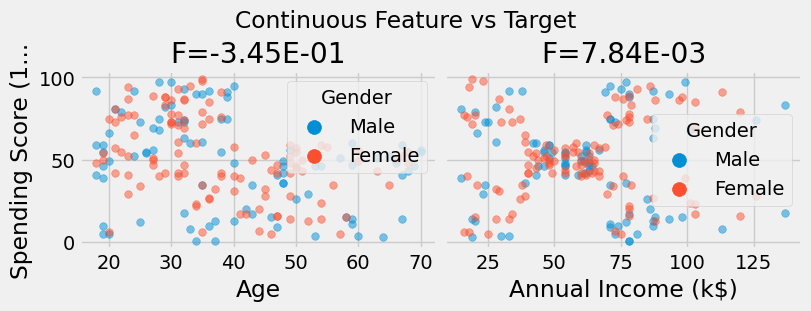

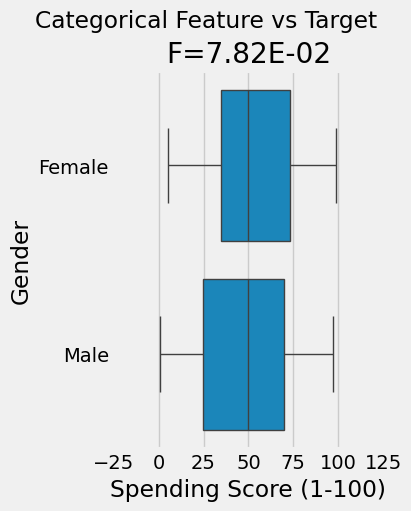

In [15]:
# Analyzing the data with respect to Spending Score
dabl.plot(data, target_col = 'Spending Score (1-100)')

Target looks like regression


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/dabl/plot/supervised.py:214: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = X_new.groupby(col)[target_col].median()


[<Axes: title={'center': 'Target distribution'}, xlabel='Annual Income (k$)', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=1.98E-02'}, xlabel='Age', ylabel='Annual Income (k$)'>,
         <Axes: title={'center': 'F=7.84E-03'}, xlabel='Spending Score (1-100)'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=1.52E-02'}, xlabel='Annual Income (k$)', ylabel='Gender'>]],
       dtype=object)]

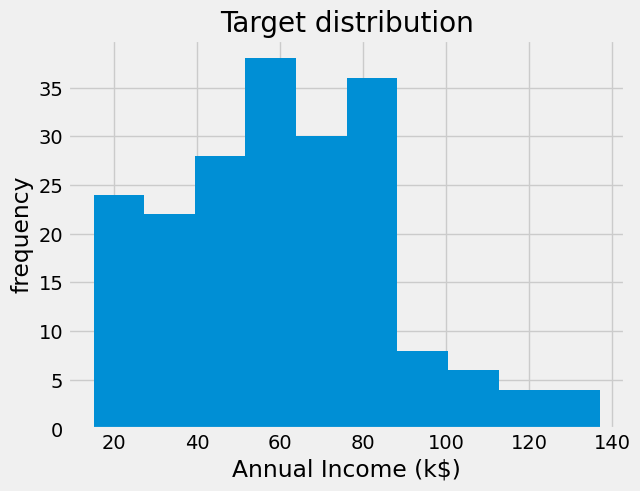

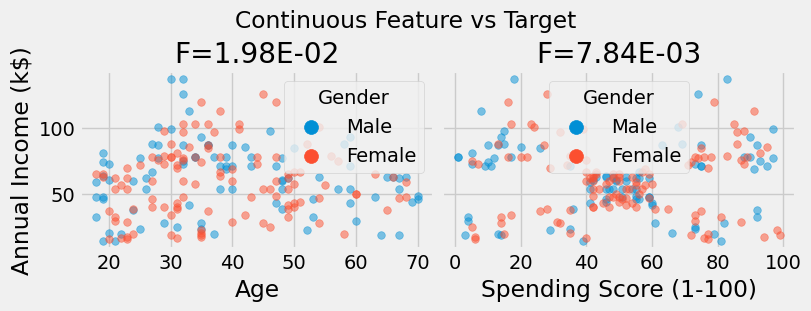

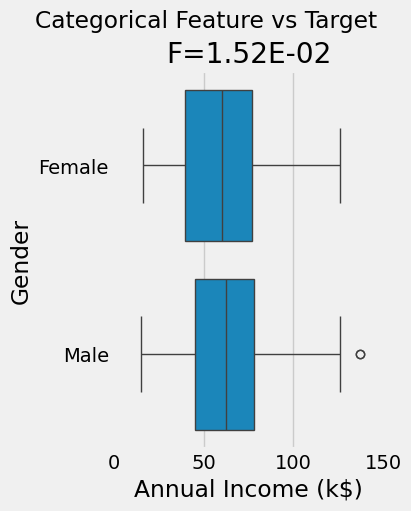

In [16]:
# Analyzing the data with respect to Annual Income
dabl.plot(data, target_col = 'Annual Income (k$)')

In [17]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [18]:
# Describing the categorical data
data.describe(include = 'object')

,Gender
count,200
unique,2
top,Female
freq,112


In [19]:
# Checking for null values in the data
data.isnull().any().any()

False

#### Distribution of Annual Income and Age

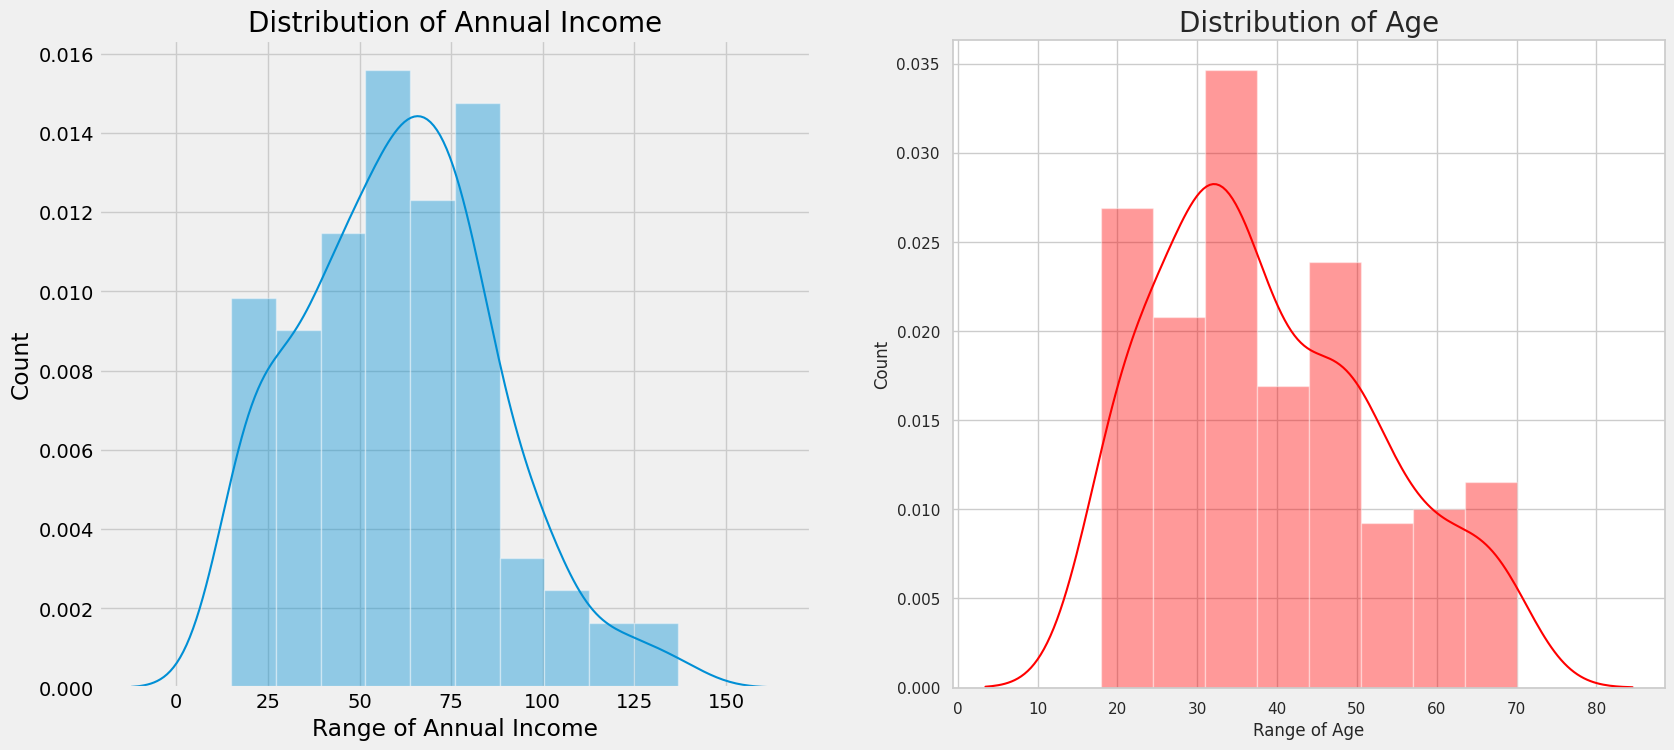

In [20]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(data['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

Observing the Distribution of the Annual Income, we can infer that there are few people who earn more than 100K US Dollars. Most of the people have an earning of around 50K-75K US Dollars. Also, we can say that the least Income is around 20K US Dollars.

From the Distribution of Age plot, we can infer that most regular customers for the Mall are around 30-35 years of age. Whereas the the senior citizens age group is the least frequent visitor in the Mall. Surprisingly, youngsters are lesser in number as compared to the middle aged people.

#### Gender Distribution of the Customers

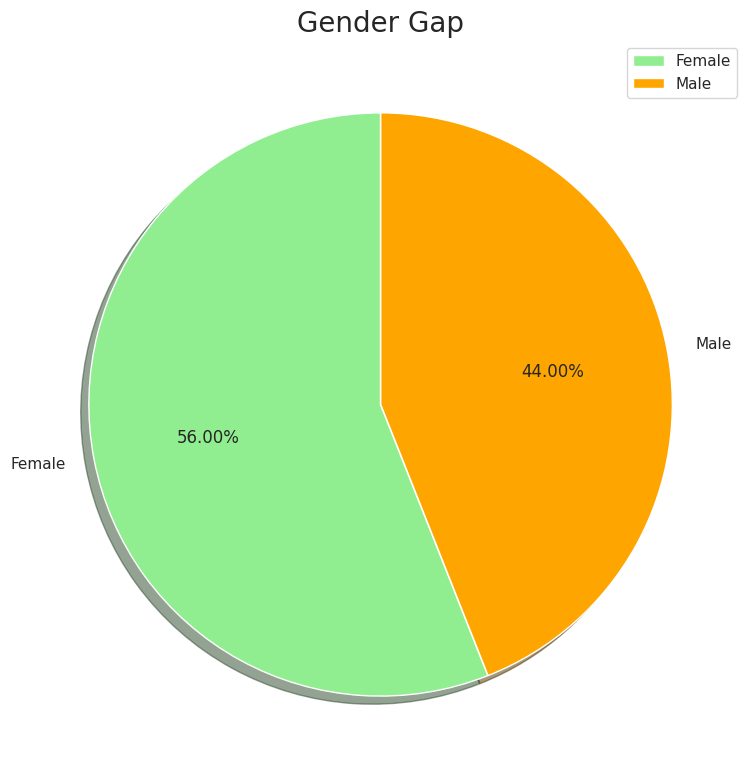

In [21]:
labels = ['Female', 'Male']
size = data['Gender'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.001]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, startangle = 90, autopct = '%.2f%%')
plt.title('Gender Gap', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

Interestingly, Females are in the lead with a share of 56% whereas the Males have a share of 44%, which is a huge gap considering that the population of Males is comparatively higher than Females.

#### Age Distribution of Customers

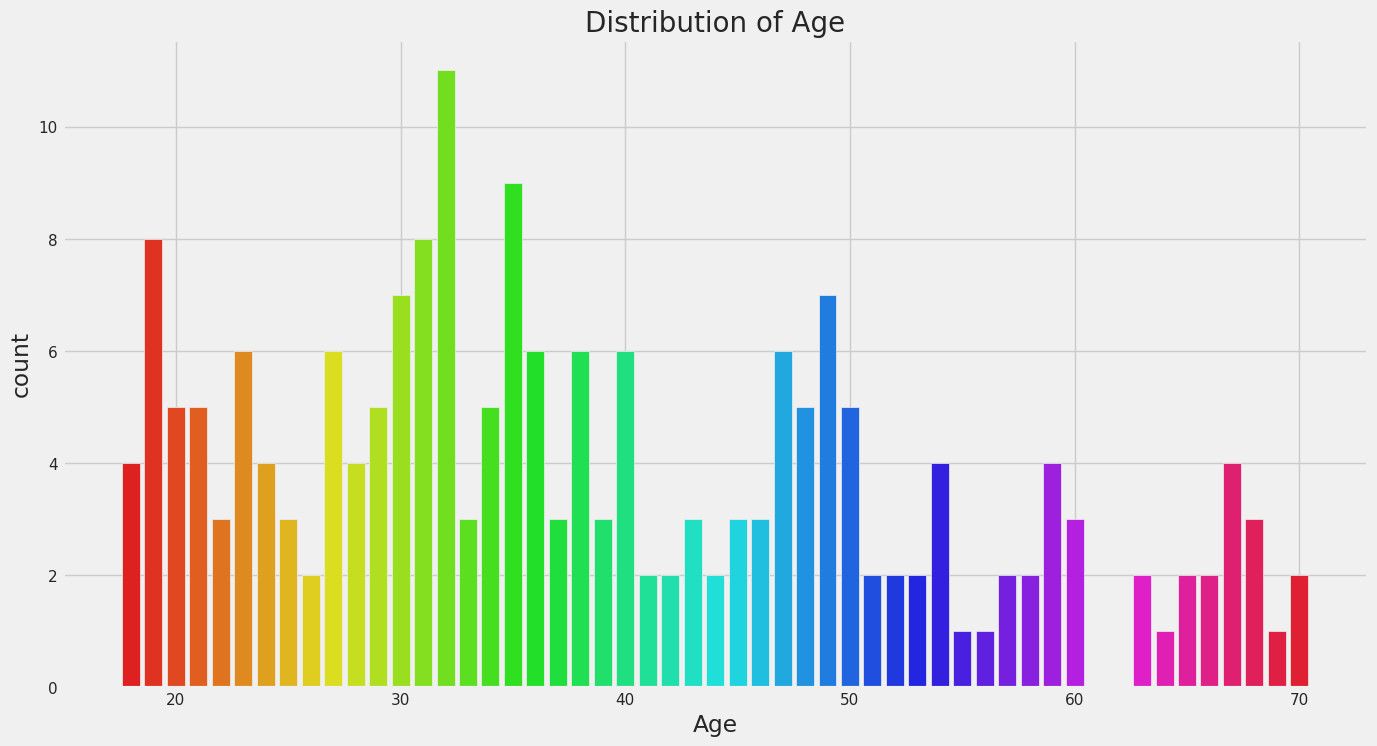

In [28]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(x=data['Age'], palette = 'hsv', native_scale=True)
plt.title('Distribution of Age', fontsize = 20)
plt.show()

By observing the above graph, we can say that ages from 27 to 39 are very much frequent; but there is no clear pattern. We can only find some group wise patterns such as the older age groups are lesser frequent in comparison. Interesting fact, there are equal no. of visitors in the Mall for the Age 18 and 67. People of **age 55, 56, 69, 64** are very **less frequent** in the malls. People at **age 32** are the **most frequent visitors** in the Mall.

#### Distribution of Annual Income

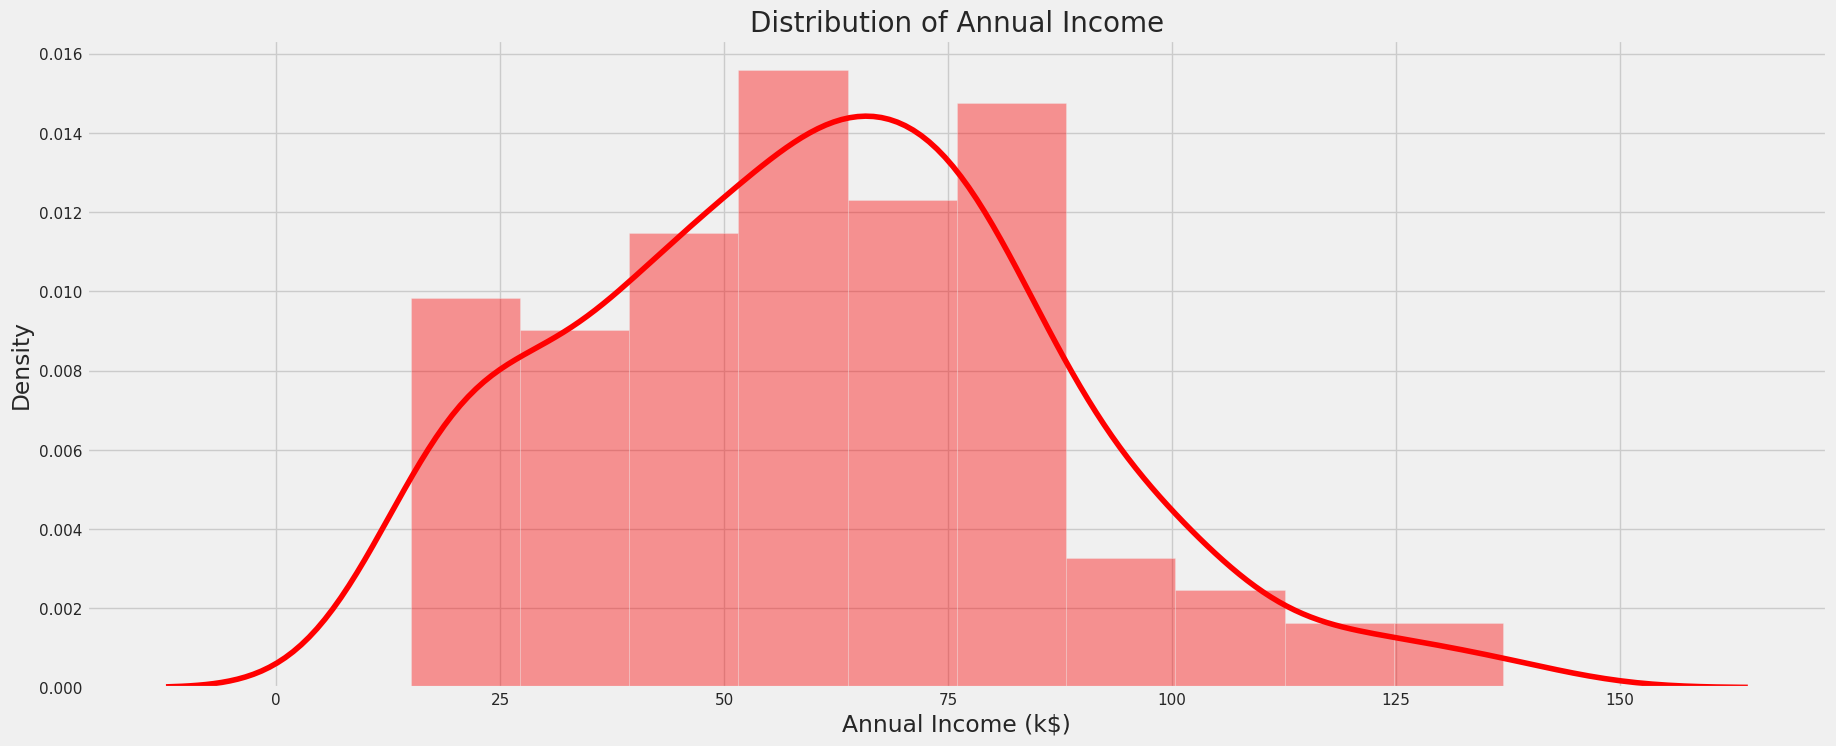

In [29]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.distplot(data['Annual Income (k$)'], color = 'red')
plt.title('Distribution of Annual Income', fontsize = 20)
plt.show()

Interestingly, there are customers in the mall with a very much comparable frequency with their Annual Income ranging from 15K US Dollars to 137K US Dollars. There are more customers in the all who have their Annual Income as 54K US Dollars or 78K US Dollars.

#### Distribution of Spending Score

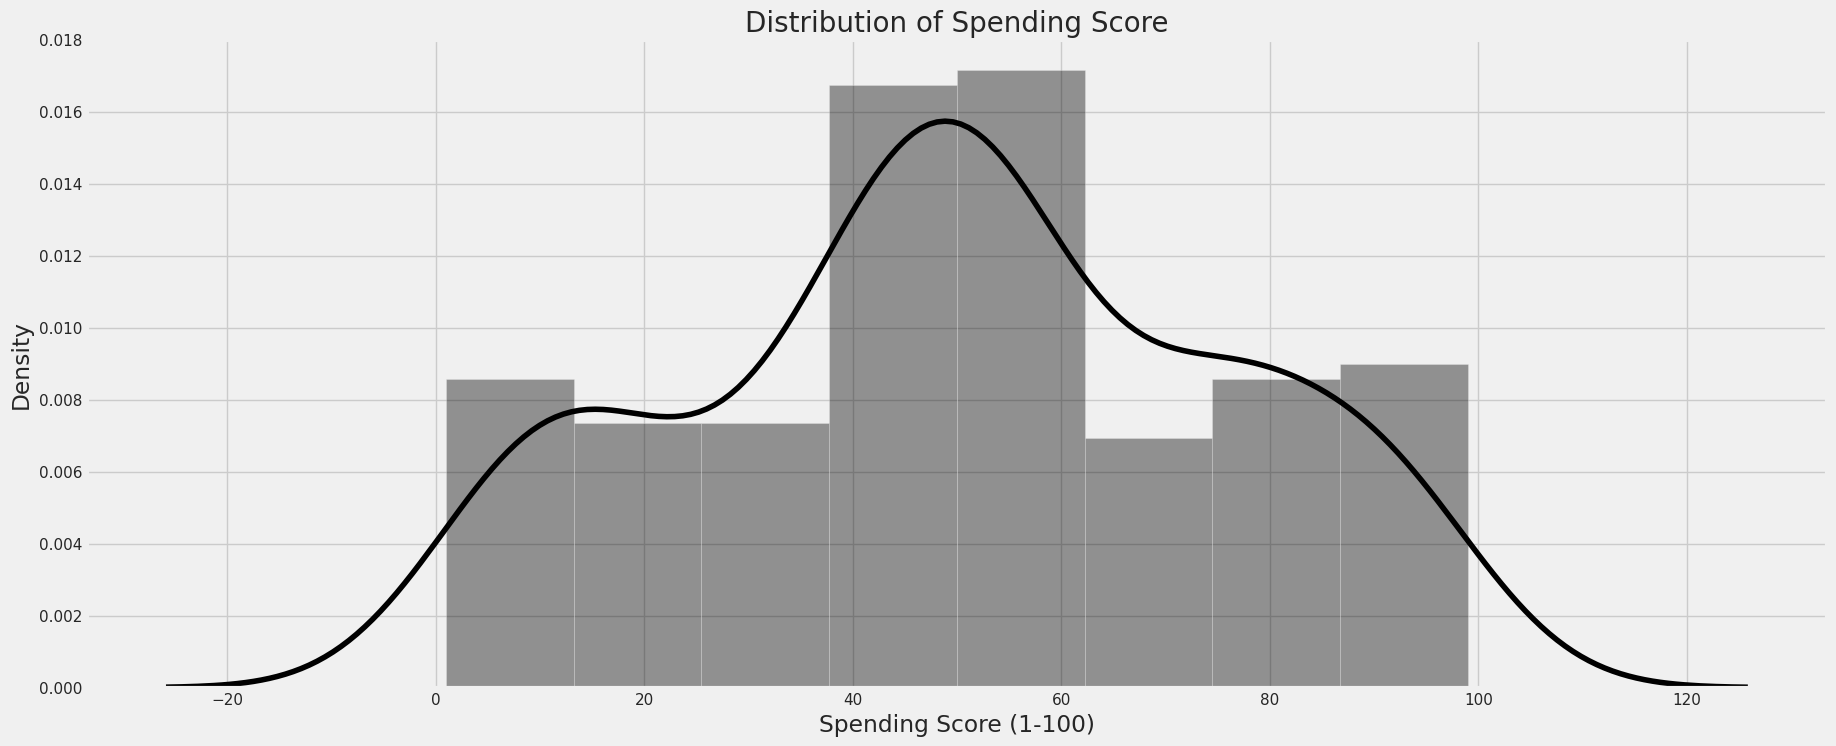

In [30]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.distplot(data['Spending Score (1-100)'], color = 'black')
plt.title('Distribution of Spending Score', fontsize = 20)
plt.show()

**This is the most important chart for marketing analysis.** 
On a general level, we may conclude that most of the customers have their Spending Score in the range of 35-60. Interestingly, there are customers that have a spending score of 1 and 99, showing that the mall caters to a variety of customers with varying needs and requirements.

#### Spending Score for Each Gender

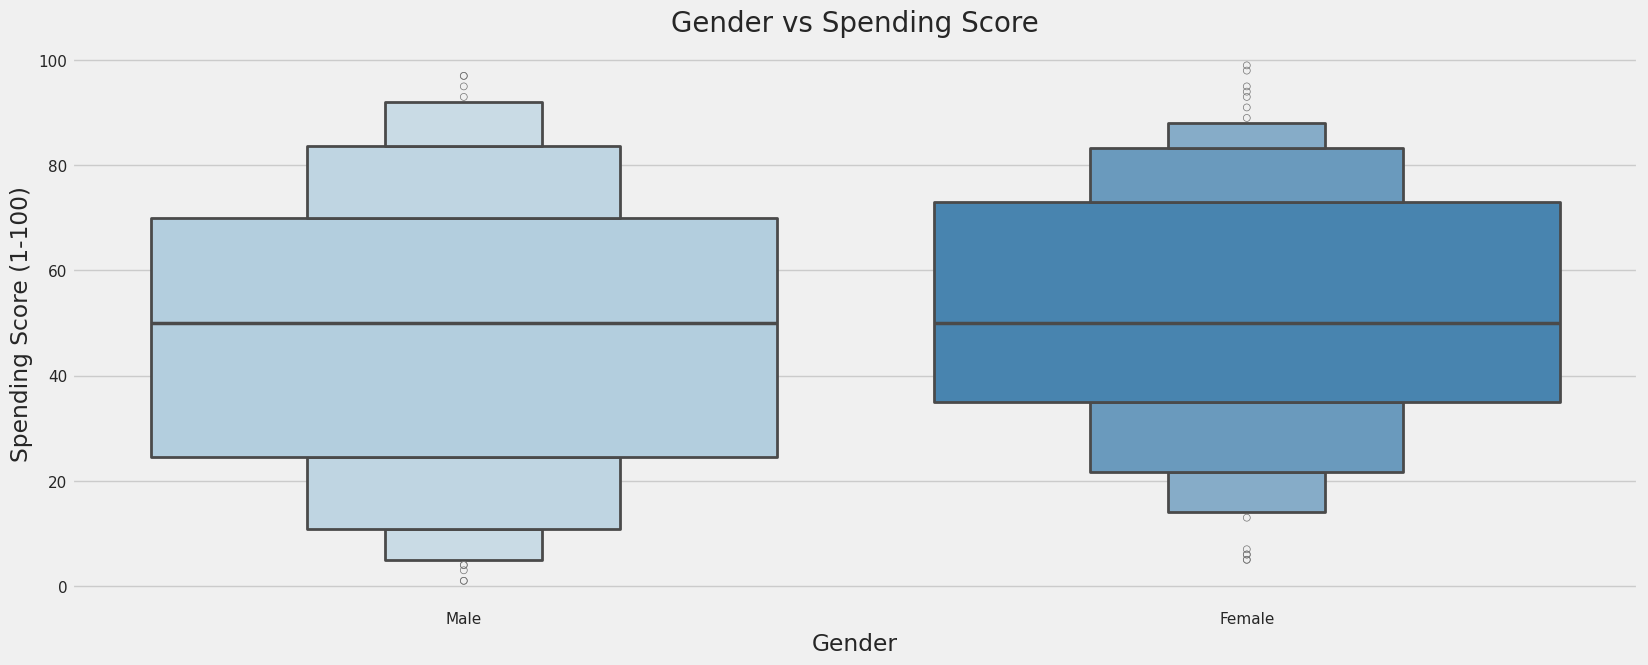

In [32]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(data=data, x=data['Gender'], y=data['Spending Score (1-100)'], palette = 'Blues')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

A Bi-variate Analysis between Gender and Spending Score, it is visible that the most of the males have a Spending Score of around 25K US Dollars to 70K US Dollars whereas the Females have a spending score of around 35K US Dollars to 75K US Dollars, which again points to the fact that women are Shopping Leaders (as seen in the gender gap pie chart).

#### Annual Income for Each Gender

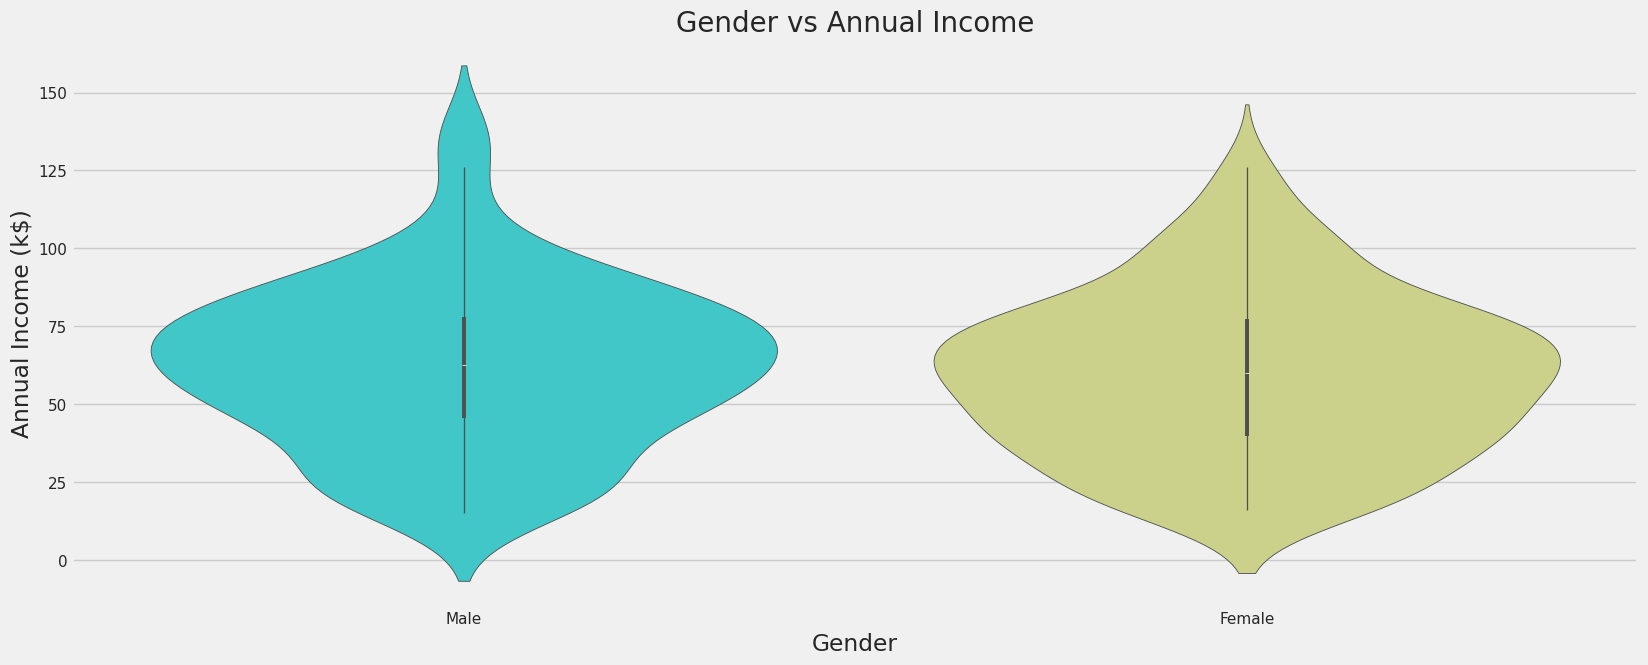

In [33]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(data=data, x=data['Gender'], y=data['Annual Income (k$)'], palette = 'rainbow')
plt.title('Gender vs Annual Income', fontsize = 20)
plt.show()

A Bivariate Analysis between the Gender and the Annual Income, to better visualize the Income of the different Genders, we can observe that there are more number of males who get paid more than females. But, the number of males and females are equal in number when it comes to low annual income.

#### Gender vs. Age Distribution

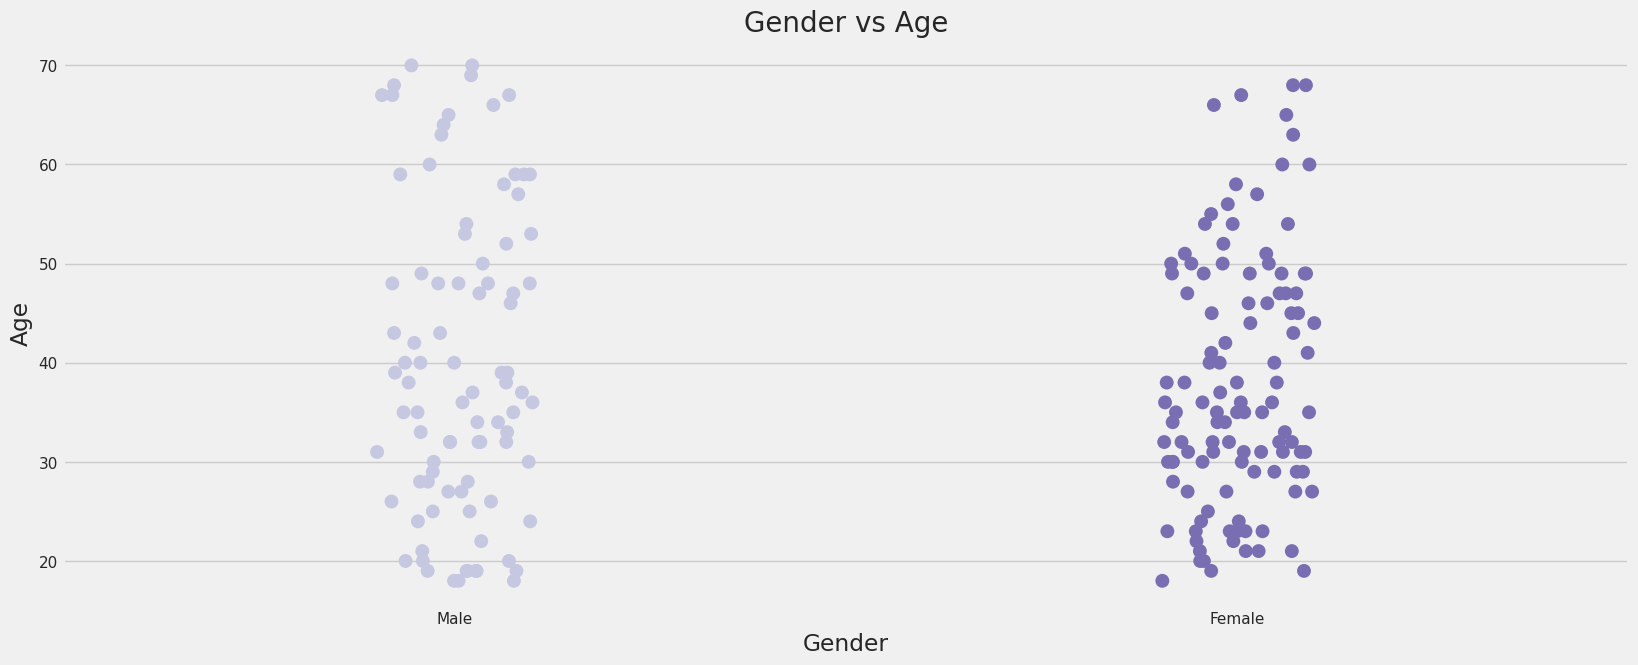

In [35]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.stripplot(data=data, x=data['Gender'], y=data['Age'], palette = 'Purples', size = 10)
plt.title('Gender vs Age', fontsize = 20)
plt.show()

From the plot, we can observe that females visiting the mall have higher age density than the males visiting the mall.

#### Annual Income vs. Age & Spending Score

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


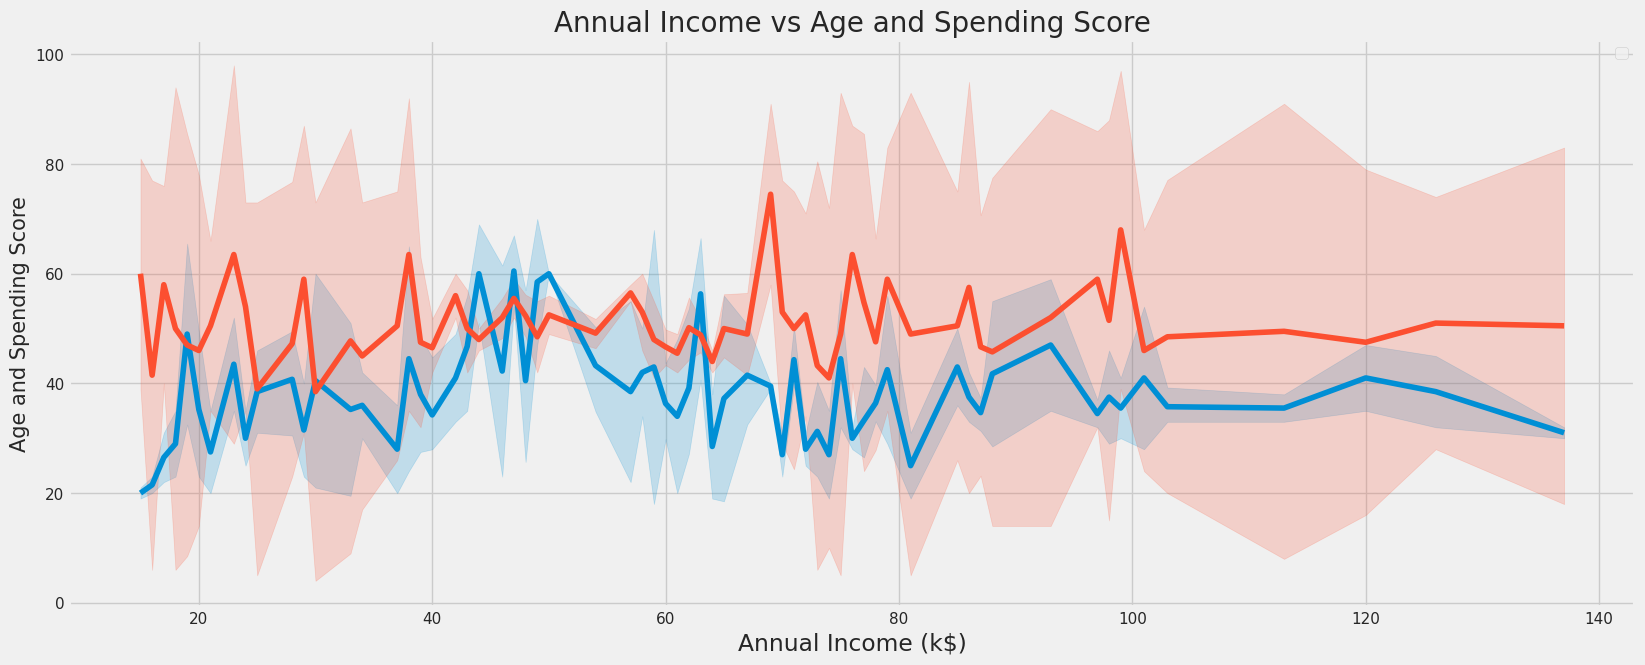

In [51]:
sns.lineplot(data=data, x=data['Annual Income (k$)'], y=data['Age'])
sns.lineplot(data=data, x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'])
plt.title('Annual Income vs Age and Spending Score', fontsize = 20)
plt.ylabel("Age and Spending Score", fontsize = 15)
plt.show()

The above Plot Between Annual Income and Age represented by a blue color line, and a plot between Annual Income and the Spending Score represented by a red color line, shows how age and spending varies with annual income.

### Clustering Analysis

Here, we want to form clusters of customers who share similar behavior to create specialized marketing campaigns.

KMeans is an iterative algorithm that tries to partition the dataset into K pre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group.

In [54]:
import warnings
warnings.filterwarnings('ignore')

# Selecting the Spending score, and Annual Income Columns from the Data
x = data.loc[:, ['Spending Score (1-100)', 'Annual Income (k$)']].values

# let's check the shape of x
print(x.shape)

(200, 2)


In [55]:
x_data  = pd.DataFrame(x)
x_data.head()

,0,1
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17


### K-Means Algorithm

#### Using the Elbow method to find the optimal number of clusters

The elbow method is a heuristic used in determining the number of clusters in a data set.

The method consists of plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use.

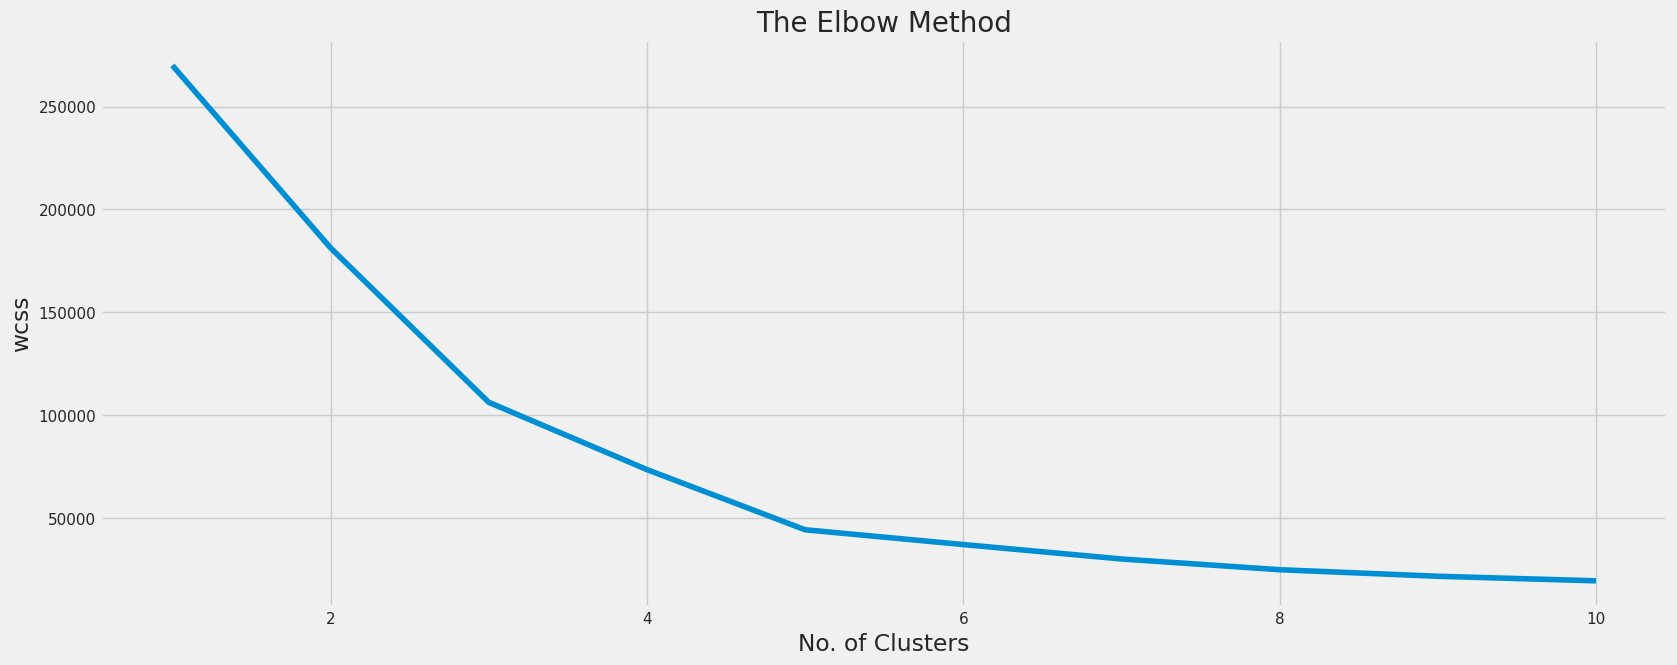

In [56]:
from sklearn.cluster import KMeans

# wcss - within cluster sum-of-squares of the distances of each data point in all clusters to their respective centroids.
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

From the above graph, we can observe that there is a sudden drop in wcss from clusters 1 to 3, and another sudden drop from 3 to 5. After 5 clusters, there is a minimal drop in wcss.

**Hence, we choose 5 as the number of clusters.**

#### Using Dendogram to Visualize the optimal number of clusters

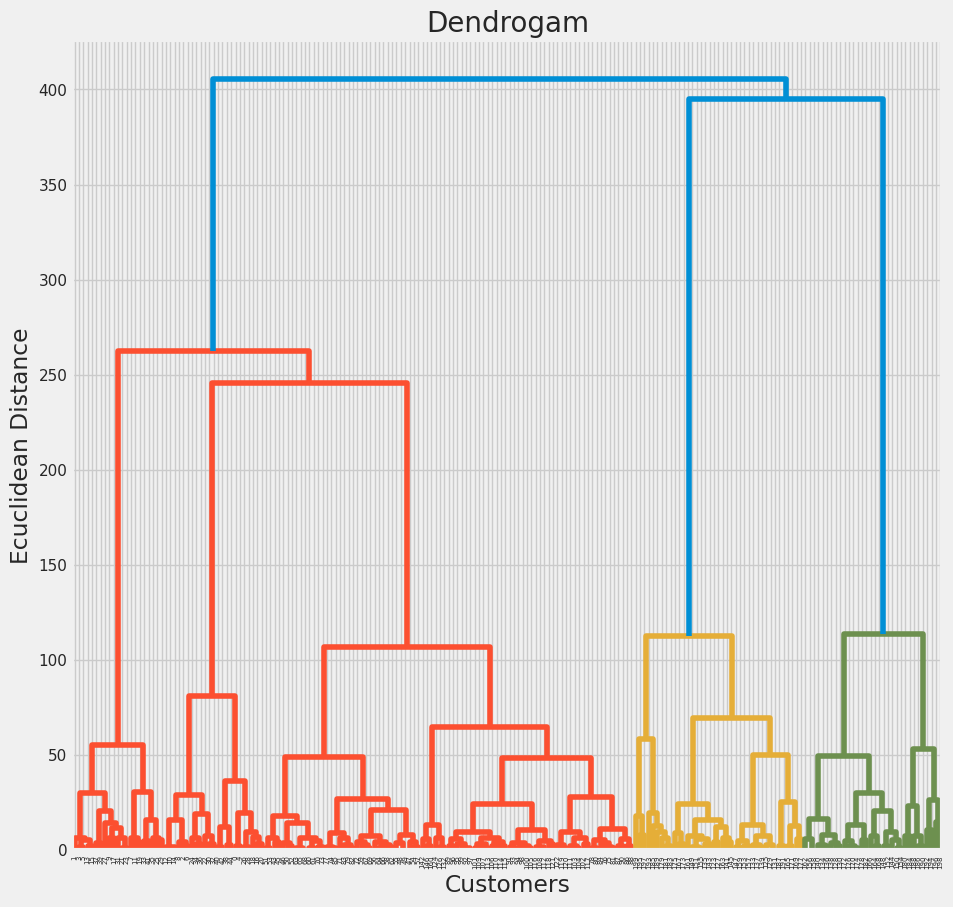

In [61]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x_data, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

#### Visualizing the Clusters

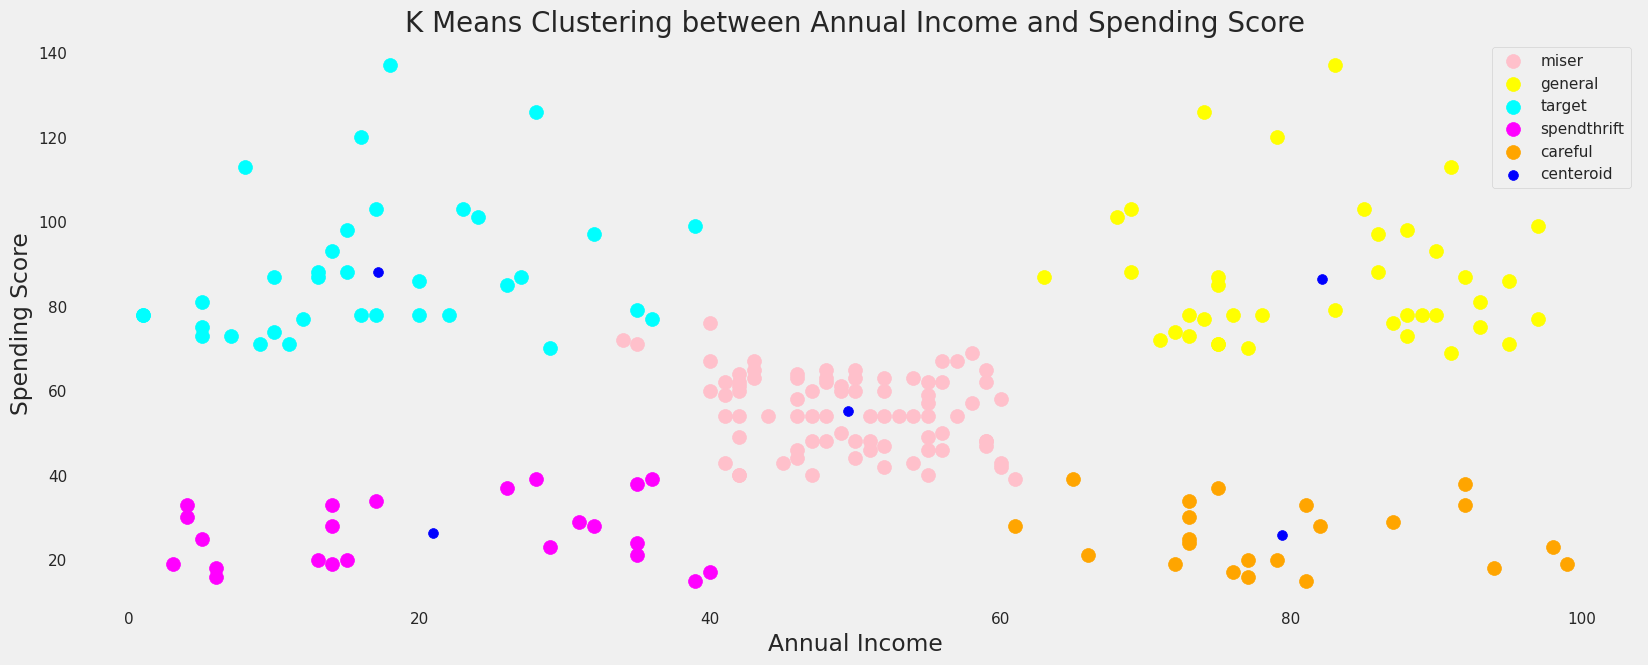

In [57]:
plt.style.use('fivethirtyeight')

km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering between Annual Income and Spending Score', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

This Clustering Analysis gives us a very clear insight about the different segments of the customers in the Mall. There are clearly Five segments of Customers namely Miser, General, Target, Spendthrift, Careful based on their Annual Income and Spending Score which are reportedly the best factors/attributes to determine the segments of a customer in a Mall.

### Clustering between Age and Spending Score

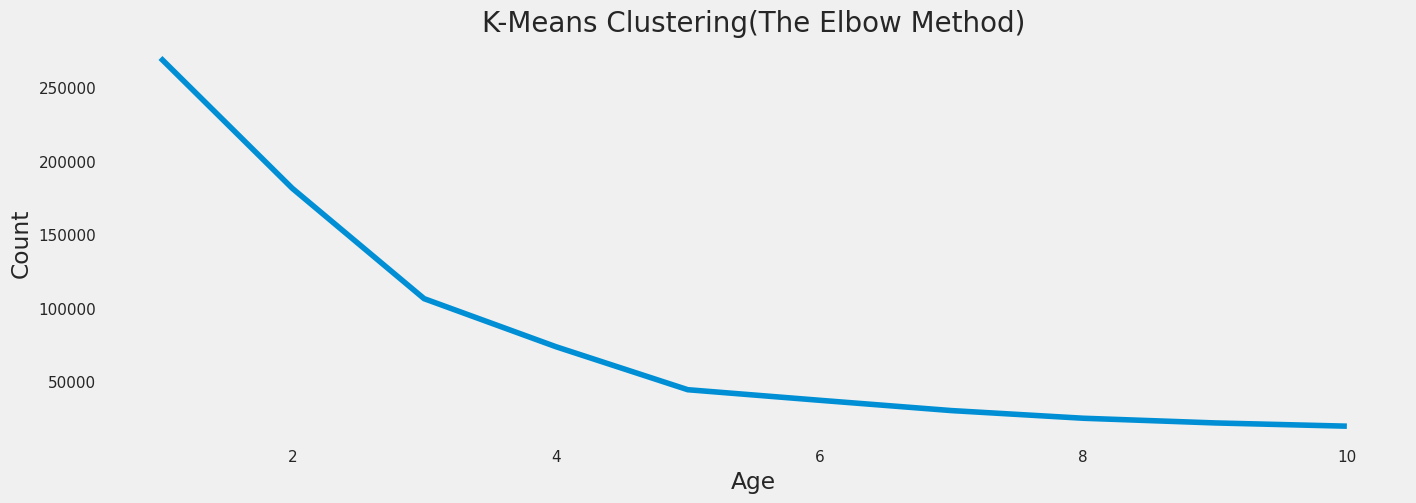

In [58]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()

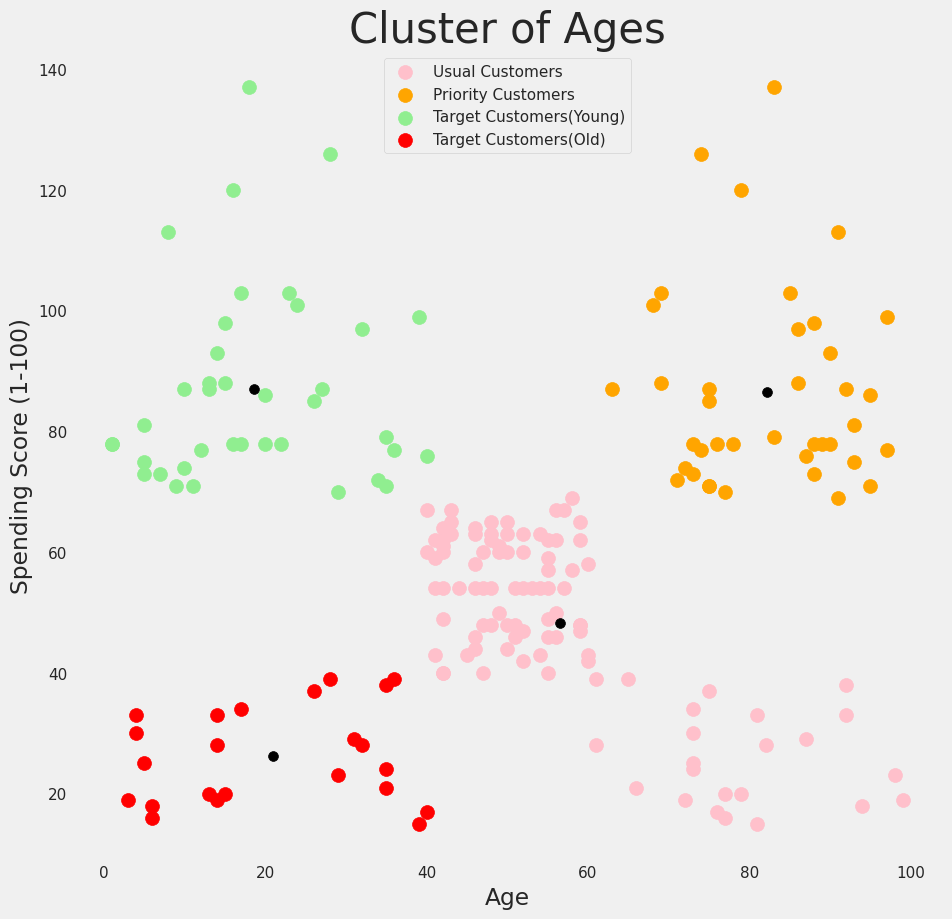

In [59]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink', label = 'Usual Customers' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers(Young)')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

By looking at the above clustering plot between the age of the customers and their corresponding spending scores, we have aggregated them into 4 different categories namely Usual Customers, Priority Customers, Senior Citizen Target Customers, Young Target Customers. 

Then, after getting the results we can accordingly make different marketing strategies and policies to optimize the spending scores of the customer in the Mall.